In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
from dev.retina_copie import Retina, RetinaWhiten

In [37]:
#args = init(filename='../data/2019-07-23')
from easydict import EasyDict
args = EasyDict({'w': 28,
 'minibatch_size': 10,
 'train_batch_size': 1000,
 'test_batch_size': 126,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'N_pic': 1718,
 'N_X': 1718,
 'N_Y': 2444,
 'N_X2': 98,
 'N_Y2': 140,
 'offset_std': 30,
 'offset_max': 34,
 'noise': 0.75,
 'contrast': 0.7,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'N_theta': 6,
 'N_azimuth': 48,
 'N_eccentricity': 80,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.5,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.005,
 'do_adam': 'adam',
 'bn1_bn_momentum': 0,
 'bn2_bn_momentum': 0,
 'momentum': 0,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': True,
 'log_interval': 20,
 'verbose': 1,
 'filename': '../data/2019-07-23',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True,
 'save_model': True,
 'zoomW': 300})

In [38]:
print('N_X :', args.N_X)
print('N_Y :', args.N_Y)
print('N_theta :', args.N_theta)
print('N_azimuth :', args.N_azimuth)
print('N_eccentricity :', args.N_eccentricity)
print('N_phase :', args.N_phase)

N_X : 1718
N_Y : 2444
N_theta : 6
N_azimuth : 48
N_eccentricity : 80
N_phase : 2


In [39]:
args.N_X, args.N_Y = 768, 1024
args_N_pic = args.N_Y

In [40]:
retina = Retina(args)

Creation du dictionnaire de filtres en cours...
Dico cree
len finale 6 2 80 16


In [41]:
retina.retina_dico.keys() # theta

dict_keys([0, 1, 2, 3, 4, 5])

In [42]:
retina.retina_dico[0].keys() # phi

dict_keys([0, 1])

In [43]:
retina.retina_dico[0][0].keys() # eccentricity

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])

In [44]:
shape_10 = int(np.sqrt(retina.retina_dico[0][0][10].shape[0]))  # central filter

In [45]:
shape_23 = int(np.sqrt(retina.retina_dico[0][0][23].shape[0])) # periphery filter

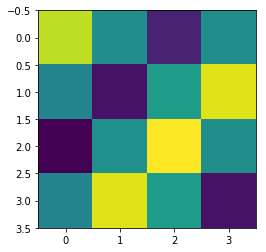

In [46]:
plt.imshow(retina.retina_dico[2][0][10].reshape((shape_10, shape_10)))

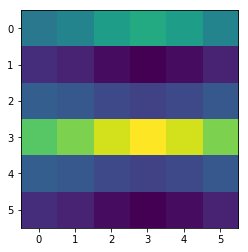

In [47]:
plt.imshow(retina.retina_dico[0][0][23].reshape((shape_23, shape_23)))

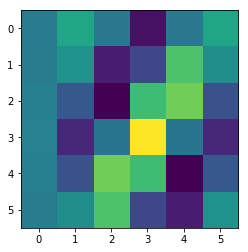

In [48]:
plt.imshow(retina.retina_dico[2][0][23].reshape((shape_23, shape_23)))

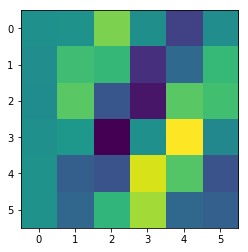

In [49]:
plt.imshow(retina.retina_dico[2][1][23].reshape((shape_23, shape_23)))

In [50]:
from PIL import Image
impath = 'data/i05june05_static_street_boston_p1010808.jpeg'
im = Image.open(impath)

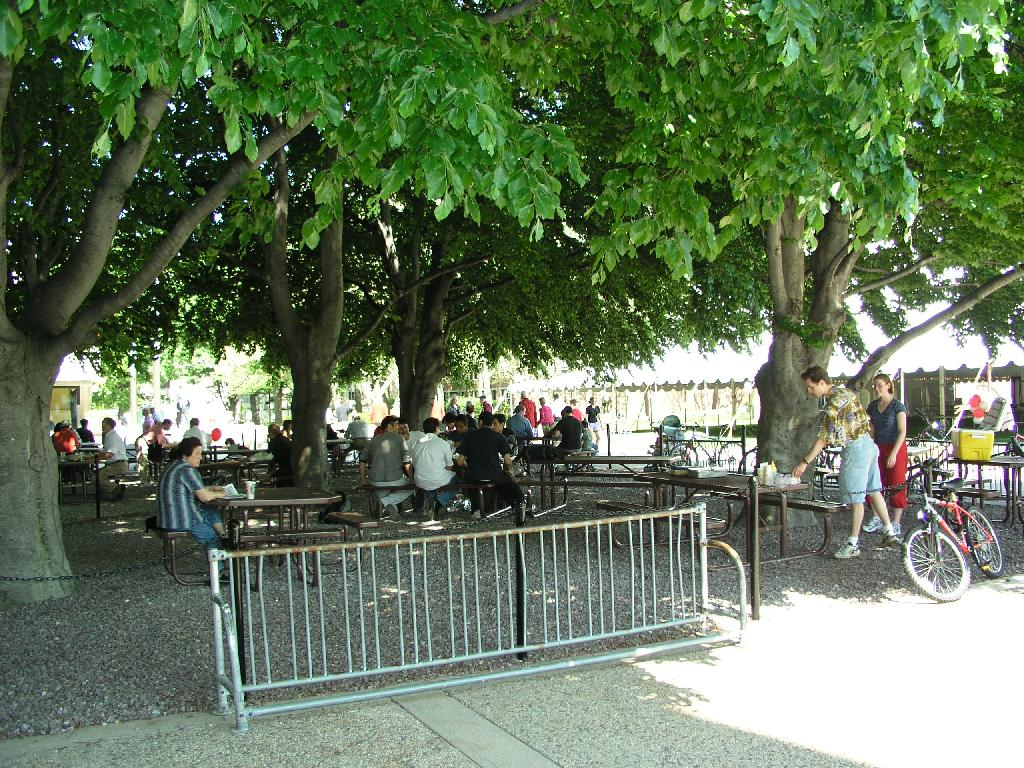

In [51]:
im

In [52]:
im_color_npy = np.asarray(im)
im_color_npy

array([[[ 17,  60,  17],
        [ 21,  64,  21],
        [ 27,  66,  22],
        ...,
        [ 44,  50,  36],
        [ 35,  36,  28],
        [ 29,  30,  22]],

       [[ 16,  59,  16],
        [ 19,  62,  17],
        [ 21,  62,  18],
        ...,
        [ 56,  65,  48],
        [ 36,  42,  28],
        [ 35,  39,  25]],

       [[ 18,  64,  18],
        [ 18,  64,  17],
        [ 18,  61,  15],
        ...,
        [ 50,  64,  38],
        [ 26,  38,  14],
        [ 32,  44,  22]],

       ...,

       [[110, 130, 121],
        [111, 131, 122],
        [102, 122, 113],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[105, 125, 116],
        [101, 121, 112],
        [ 88, 108,  99],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[105, 125, 116],
        [ 98, 118, 109],
        [ 81, 101,  92],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [53]:
im_bw = im.convert("L")

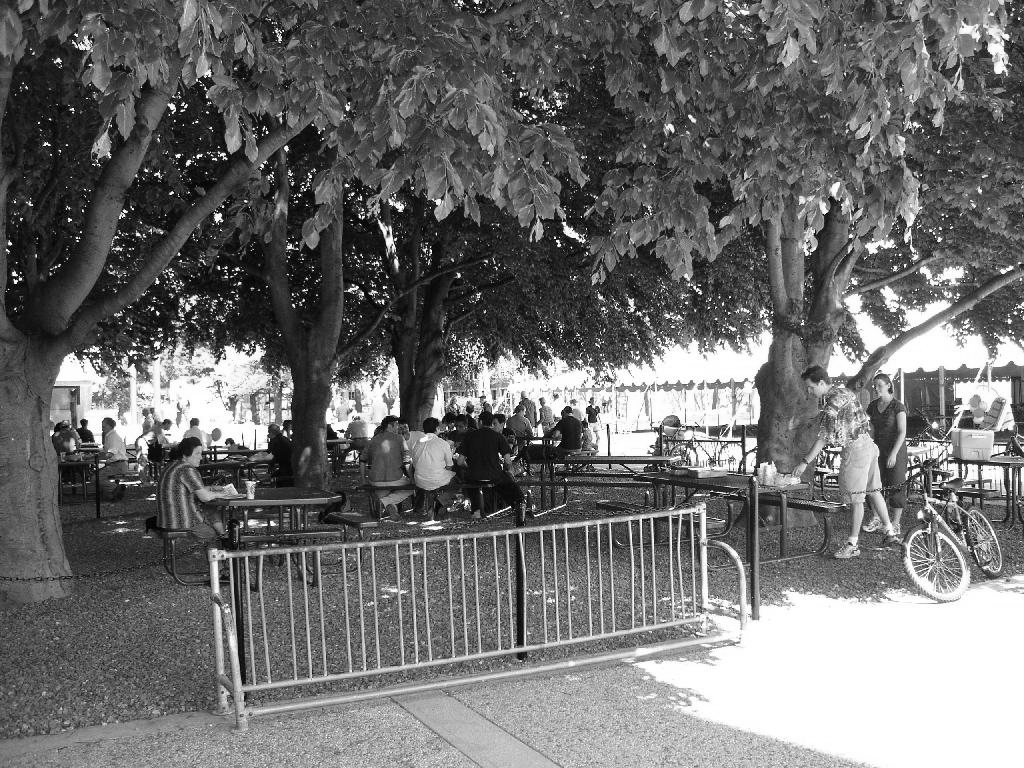

In [54]:
im_bw

In [55]:
im_npy = np.asarray(im_bw)

In [56]:
im_npy

array([[ 42,  46,  49, ...,  46,  34,  28],
       [ 41,  44,  44, ...,  60,  38,  36],
       [ 45,  44,  42, ...,  56,  31,  37],
       ...,
       [122, 123, 114, ..., 255, 255, 255],
       [117, 113, 100, ..., 255, 255, 255],
       [117, 110,  93, ..., 255, 255, 255]], dtype=uint8)

In [57]:
args.N_X, args.N_Y = im_npy.shape
args_N_pic = args.N_Y

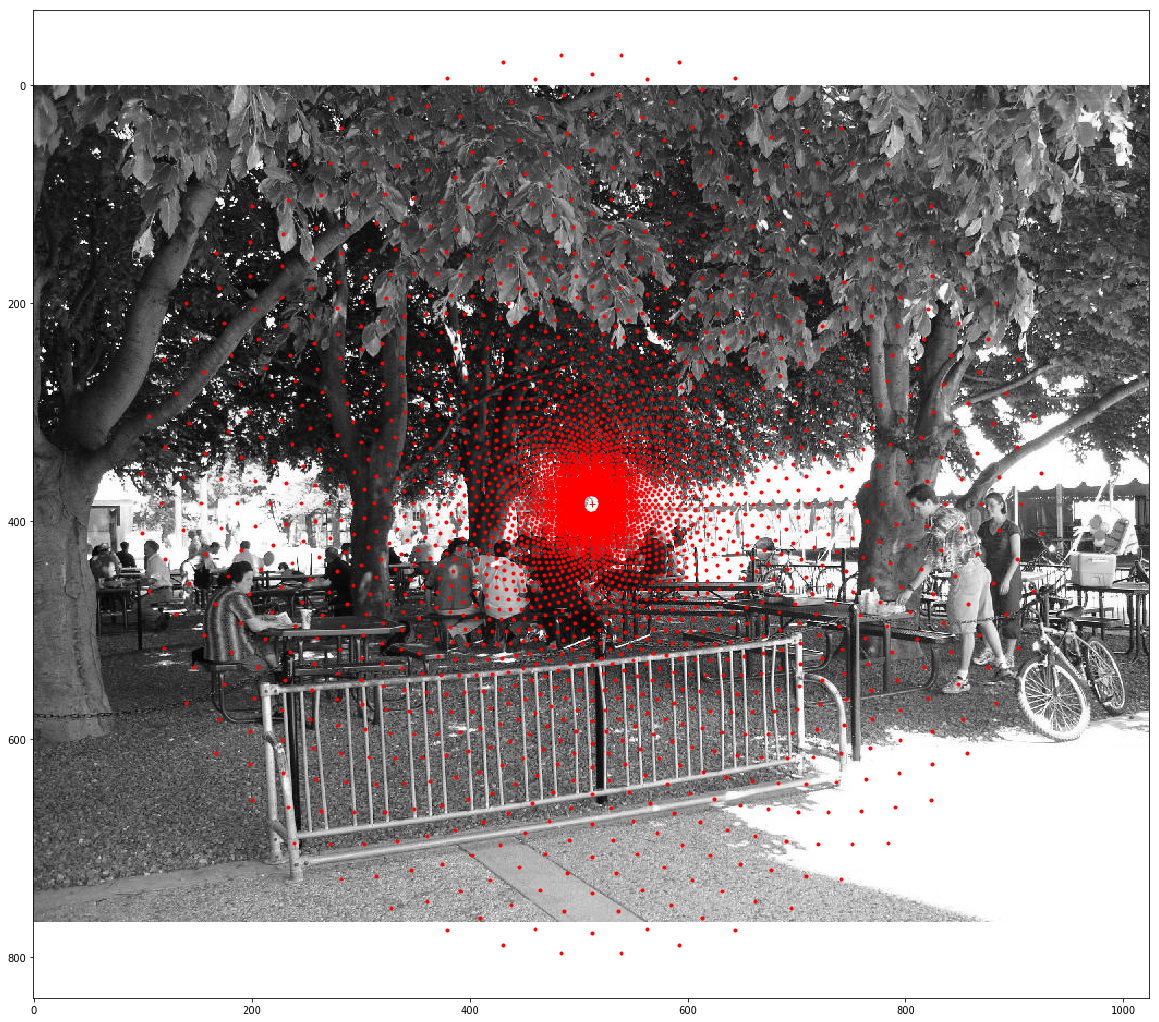

In [58]:
plt.figure(figsize=(20, 20))
plt.imshow(im_bw)

ecc_max = .8
rho = 1.05
args.N_eccentricity = 80

N_X, N_Y = args.N_X, args.N_Y
plt.plot(N_Y / 2 ,N_X / 2  , '+r')

for i_eccentricity in range(args.N_eccentricity):
    for i_azimuth in range(args.N_azimuth):

        ecc = ecc_max * (1 / rho) ** ((args.N_eccentricity - i_eccentricity) )

        N_min = min(N_X, N_Y)
        r = np.sqrt(N_min ** 2 + N_min ** 2) / 2 * ecc #- 30  # radius
        # r = np.sqrt(N_X ** 2 + N_Y ** 2) / 2 * ecc - 30 # radius
        psi = (i_azimuth + (i_eccentricity % 2) * .5) * np.pi * 2 / args.N_azimuth
        x = int(N_X / 2 + r * np.cos(psi))
        y = int(N_Y / 2 + r * np.sin(psi))
        plt.plot(y, x  , '.r')


In [59]:
whiten_transform = RetinaWhiten(args)
im_whiten = whiten_transform(im_npy)

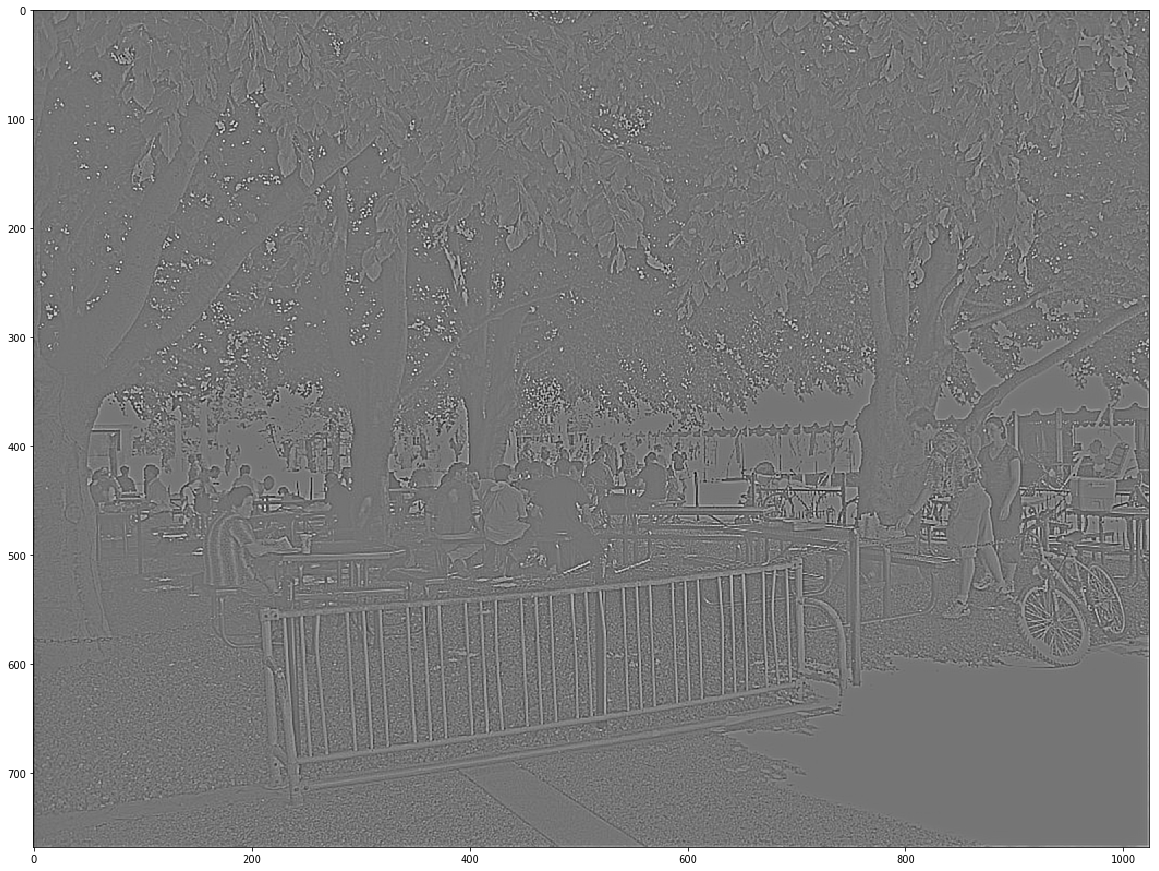

In [60]:
plt.figure(figsize=(20,20))
plt.imshow(im_whiten, cmap='gray')

In [61]:
retina_features = retina.transform(im_whiten)

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
i

image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (1

image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (2

image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (4

image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (8

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (1

image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (1

image (32, 32) filter (32, 32)
image (32, 32) filter (32, 32)
image (32, 32) filter (32, 32)
image (32, 32) filter (32, 32)
image (32, 32) filter (32, 32)
image (32, 32) filter (32, 32)
image (32, 32) filter (32, 32)
image (32, 32) filter (32, 32)
image (32, 32) filter (32, 32)
image (32, 32) filter (32, 32)
image (32, 32) filter (32, 32)
image (32, 32) filter (32, 32)
image (32, 32) filter (32, 32)
image (32, 32) filter (32, 32)
image (32, 32) filter (32, 32)
image (32, 32) filter (32, 32)
image (32, 32) filter (32, 32)
image (32, 32) filter (32, 32)
image (32, 32) filter (32, 32)
image (32, 32) filter (32, 32)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (3

image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (6

image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (90, 102) filter (90, 102)
image (63, 102) filter (63, 102)
image (44, 102) filter (44, 102)
image (30, 102) filter (30, 102)
image (23, 102) filter (23, 102)
image (23, 102) filter (23, 102)
image (30, 102) filter (30, 102)
image (44, 102) filter (44, 102)
image (63, 102) filter (63, 102)
image (90, 102) filter (90, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (91, 102) filter (91, 102)
image (

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
i

image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (1

image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (2

image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (38, 38) filter (38, 38)
image (3

image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (68, 68) filter (68, 68)
image (68, 68) filter (68, 68)
image (68, 68) filter (68, 68)
image (6

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
i

image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (1

image (22, 22) filter (22, 22)
image (22, 22) filter (22, 22)
image (22, 22) filter (22, 22)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (2

image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (40, 40) filter (40, 40)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (4

image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (72, 72) filter (72, 72)
image (7

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
i

image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (1

image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (2

image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (3

image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (6

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
i

image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (1

image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (30, 30) filter (30, 30)
image (3

image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (54, 54) filter (54, 54)
image (5

image (92, 92) filter (92, 92)
image (92, 92) filter (92, 92)
image (92, 92) filter (92, 92)
image (92, 92) filter (92, 92)
image (92, 92) filter (92, 92)
image (92, 92) filter (92, 92)
image (92, 92) filter (92, 92)
image (92, 92) filter (92, 92)
image (92, 92) filter (92, 92)
image (92, 92) filter (92, 92)
image (92, 92) filter (92, 92)
image (92, 92) filter (92, 92)
image (92, 92) filter (92, 92)
image (75, 92) filter (75, 92)
image (62, 92) filter (62, 92)
image (56, 92) filter (56, 92)
image (38, 96) filter (38, 96)
image (42, 96) filter (42, 96)
image (52, 96) filter (52, 96)
image (68, 96) filter (68, 96)
image (91, 96) filter (91, 96)
image (96, 96) filter (96, 96)
image (96, 96) filter (96, 96)
image (96, 96) filter (96, 96)
image (96, 96) filter (96, 96)
image (96, 96) filter (96, 96)
image (96, 96) filter (96, 96)
image (96, 96) filter (96, 96)
image (96, 96) filter (96, 96)
image (96, 96) filter (96, 96)
image (96, 96) filter (96, 96)
image (96, 96) filter (96, 96)
image (9

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
i

image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (1

image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (2

image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (3

image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (66, 66) filter (66, 66)
image (68, 68) filter (68, 68)
image (6

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
i

image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (1

image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (2

image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (4

image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (71, 88) filter (71, 88)
image (74, 88) filter (74, 88)
image (83, 88) filter (83, 88)
image (88, 88) filter (88, 88)
image (88, 88) filter (88, 88)
image (88, 88) filter (88, 88)
image (88, 88) filter (88, 88)
image (88, 88) filter (88, 88)
image (88, 88) filter (88, 88)
image (88, 88) filter (88, 88)
image (8

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
i

image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (1

image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (18, 18) filter (18, 18)
image (1

image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (3

image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (6

image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (90, 102) filter (90, 102)
image (63, 102) filter (63, 102)
image (44, 102) filter (44, 102)
image (30, 102) filter (30, 102)
image (23, 102) filter (23, 102)
image (23, 102) filter (23, 102)
image (30, 102) filter (30, 102)
image (44, 102) filter (44, 102)
image (63, 102) filter (63, 102)
image (90, 102) filter (90, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image (102, 102) filter (102, 102)
image

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
i

image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (10, 10) filter (10, 10)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (1

image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (20, 20) filter (20, 20)
image (2

image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (34, 34) filter (34, 34)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (36, 36) filter (36, 36)
image (3

image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (60, 60) filter (60, 60)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (62, 62) filter (62, 62)
image (6

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
image (6, 6) filter (6, 6)
i

image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (12, 12) filter (12, 12)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (14, 14) filter (14, 14)
image (1

image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (24, 24) filter (24, 24)
image (2

image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (42, 42) filter (42, 42)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (44, 44) filter (44, 44)
image (4

image (76, 76) filter (76, 76)
image (76, 76) filter (76, 76)
image (76, 76) filter (76, 76)
image (76, 76) filter (76, 76)
image (76, 76) filter (76, 76)
image (76, 76) filter (76, 76)
image (76, 76) filter (76, 76)
image (76, 76) filter (76, 76)
image (76, 76) filter (76, 76)
image (76, 76) filter (76, 76)
image (76, 76) filter (76, 76)
image (76, 76) filter (76, 76)
image (76, 76) filter (76, 76)
image (76, 76) filter (76, 76)
image (76, 76) filter (76, 76)
image (76, 76) filter (76, 76)
image (76, 76) filter (76, 76)
image (76, 76) filter (76, 76)
image (76, 76) filter (76, 76)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (8

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
image (4, 4) filter (4, 4)
i

image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
image (8, 8) filter (8, 8)
i

image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (16, 16) filter (16, 16)
image (1

image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (28, 28) filter (28, 28)
image (2

image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (48, 48) filter (48, 48)
image (4

image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (80, 80) filter (80, 80)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (84, 84) filter (84, 84)
image (8

In [62]:
retina_features.shape

(46080,)

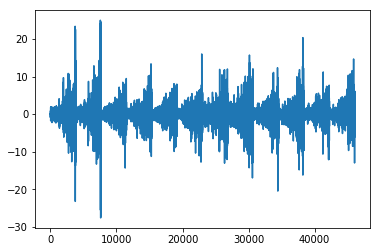

In [63]:
plt.plot(retina_features)

In [64]:
img_trans = retina.inverse_transform(retina_features)

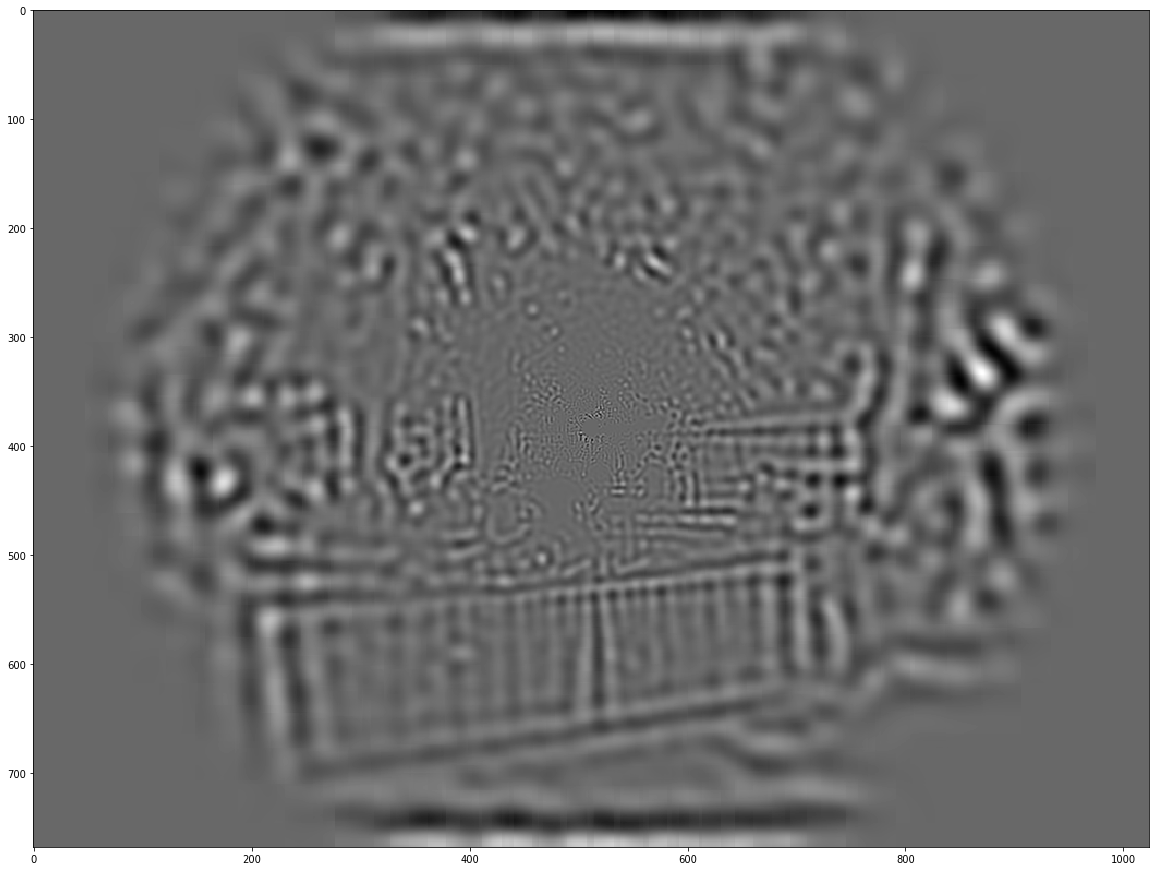

In [65]:
plt.figure(figsize=(20,20))
plt.imshow(img_trans, cmap='gray')

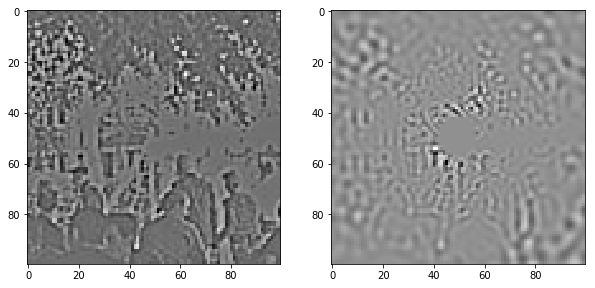

In [66]:
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(im_whiten[args.N_X//2-50:args.N_X//2 + 50, args.N_Y//2-50:args.N_Y//2 + 50], cmap='gray')
plt.subplot(122)
plt.imshow(img_trans[args.N_X//2-50:args.N_X//2 + 50, args.N_Y//2-50:args.N_Y//2 + 50], cmap='gray')

In [67]:
from LogGabor import LogGabor

N_theta=6
rho = 1.41
ecc_max = .8  # self.args.ecc_max
sf_0_r = 0.03  # self.args.sf_0_r
sf_0_max = 0.45
B_theta = np.pi / N_theta / 2  # self.args.B_theta
B_sf = .4

pe = {'N_image': 100, 'seed': None, 'N_X': 512, 'N_Y': 512, 'noise': 
0.1, 'do_mask': True, 'mask_exponent': 3.0, 'do_whitening': True, 
'white_name_database': 'kodakdb', 'white_n_learning': 0, 'white_N': 
0.07, 'white_N_0': 0.0, 'white_f_0': 0.4, 'white_alpha': 1.4, 
'white_steepness': 4.0, 'white_recompute': False, 'base_levels': 
1.618, 'n_theta': 24, 'B_sf': 0.4, 'B_theta': 0.17453277777777776, 
'use_cache': True, 'figpath': 'results', 'edgefigpath': 
'results/edges', 'matpath': 'cache_dir', 'edgematpath': 
'cache_dir/edges', 'datapath': 'database/', 'ext': '.pdf', 'figsize': 
14.0, 'formats': ['pdf', 'png', 'jpg'], 'dpi': 450, 'verbose': 0}


lg = LogGabor(pe=pe)

i_eccentricity = 15
N_eccentricity = 48
ecc = ecc_max * (1 / rho) ** (N_eccentricity - i_eccentricity)

i_theta = 5
N_theta = 6
theta_ref = i_theta * np.pi / N_theta
sf_0 = 0.5 * sf_0_r / ecc
sf_0 = np.min((sf_0, sf_0_max))

N = 200
dimension_filtre = int( N /2 * ecc)
#if dimension_filtre % 2 == 1:
#    dimension_filtre += 1
#dimension_filtre = 100


# print("dimension_filtre", dimension_filtre)
lg.set_size((dimension_filtre, dimension_filtre))

i_phase = 1
phase = i_phase * np.pi / 2

x = dimension_filtre // 2

y = dimension_filtre // 2

params = {'sf_0': sf_0,
           'B_sf': B_sf,
           'theta': theta_ref,
           'B_theta': B_theta}

filter = lg.normalize(lg.invert(lg.loggabor(x, y, **params) * np.exp(-1j * phase)))

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
plt.imshow(filter)

In [ ]:
plt.plot(ecc_max * (1 / rho) ** (N_eccentricity - np.arange(N_eccentricity)))
plt.plot(ecc_max * (1 / 1.21) ** (N_eccentricity - np.arange(N_eccentricity)))
plt.plot(ecc_max * (1 / 1.08) ** (N_eccentricity - np.arange(N_eccentricity)))

In [ ]:
plt.plot(ecc_max * (1 / rho) ** (N_eccentricity - np.arange(10)))